<a href="https://colab.research.google.com/github/sanaa-04/ASL_detection/blob/main/ASL_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/grassknoted/asl-alphabet")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sanamansoori
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/grassknoted/asl-alphabet


100%|██████████| 1.03G/1.03G [00:07<00:00, 141MB/s] 


In [1]:
# import data processing and visualisation libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import image processing libraries
import cv2
import skimage
from skimage.transform import resize

# import tensorflow and keras
import tensorflow as tf
from tensorflow import keras
import os

print("Packages imported...")

Packages imported...


In [2]:

train_data = []
train_labels = []

# Define the path to the training data
train_path = '/content/asl-alphabet/asl_alphabet_train/asl_alphabet_train'

# Iterate through each folder (representing a letter)
for folder_name in os.listdir(train_path):
    folder_path = os.path.join(train_path, folder_name)

    # Check if it's a directory
    if os.path.isdir(folder_path):
        # Iterate through each image in the folder
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)

            # Read the image
            image = cv2.imread(image_path)

            # Append the image and its label to the lists
            train_data.append(image)
            train_labels.append(folder_name)

print("Training data loaded.")
print(f"Number of training images: {len(train_data)}")
print(f"Number of training labels: {len(train_labels)}")


Training data loaded.
Number of training images: 87000
Number of training labels: 87000


In [4]:
print("The shape of one image is : ", train_data[0].shape)

The shape of one image is :  (200, 200, 3)


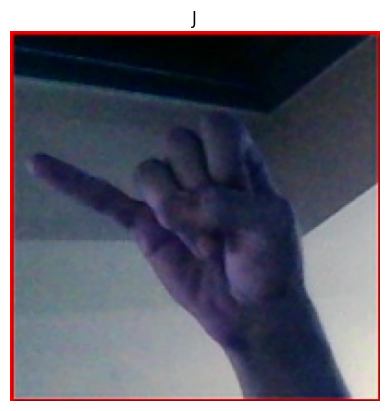

In [6]:
# prompt: view image

import matplotlib.pyplot as plt
plt.imshow(train_data[0])
plt.title(train_labels[0])
plt.axis('off')
plt.show()

In [5]:
# Creating a subset of the data in which contain 200 images of each category

subset_size = 100
subset_data = []
subset_labels = []
label_counts = {}
for i in range(len(train_data)):
  label = train_labels[i]
  if label not in label_counts:
    label_counts[label] = 0
  if label_counts[label] < subset_size:
    subset_data.append(train_data[i])
    subset_labels.append(label)
    label_counts[label] += 1
print("Subset data created.")
print(f"Number of subset images: {len(subset_data)}")
print(f"Number of subset labels: {len(subset_labels)}")
print("Label counts in subset:", label_counts)

Subset data created.
Number of subset images: 2900
Number of subset labels: 2900
Label counts in subset: {'J': 100, 'B': 100, 'M': 100, 'T': 100, 'I': 100, 'W': 100, 'Y': 100, 'O': 100, 'Z': 100, 'P': 100, 'C': 100, 'R': 100, 'E': 100, 'X': 100, 'del': 100, 'G': 100, 'K': 100, 'nothing': 100, 'V': 100, 'A': 100, 'U': 100, 'D': 100, 'Q': 100, 'N': 100, 'L': 100, 'space': 100, 'H': 100, 'S': 100, 'F': 100}


In [6]:
print("The shape of one image is : ", subset_data[0].shape)

The shape of one image is :  (200, 200, 3)


Subset data converted to grayscale.
The shape of one grayscale image is :  (200, 200)


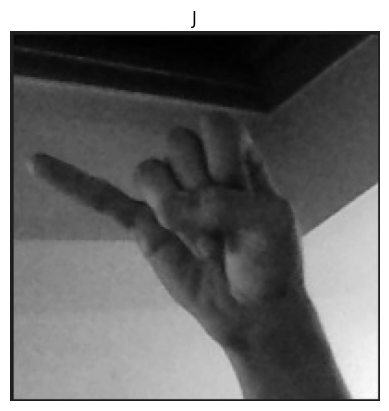

In [7]:
# Converting the subset data into greyscale

import matplotlib.pyplot as plt
subset_data_grey = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in subset_data]
print("Subset data converted to grayscale.")
print("The shape of one grayscale image is : ", subset_data_grey[0].shape)
plt.imshow(subset_data_grey[0], cmap='gray')
plt.title(subset_labels[0])
plt.axis('off')
plt.show()

Subset data resized to 64x64x3.
The shape of one resized image is :  (64, 64, 3)


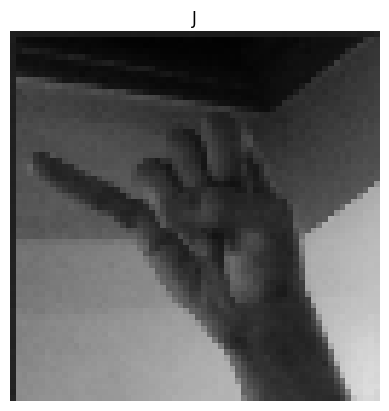

In [8]:
# resizing the greyscale subset data into 64, 64, 3

import matplotlib.pyplot as plt
resized_subset_data = []
for img in subset_data_grey:
    # Resize the grayscale image to 64x64
    resized_img = cv2.resize(img, (64, 64))
    # Convert the grayscale image (64x64) to a 3-channel image (64x64x3) by repeating the grayscale channel
    resized_img_3channel = cv2.cvtColor(resized_img, cv2.COLOR_GRAY2RGB)
    resized_subset_data.append(resized_img_3channel)

print("Subset data resized to 64x64x3.")
print("The shape of one resized image is : ", resized_subset_data[0].shape)

plt.imshow(resized_subset_data[0])
plt.title(subset_labels[0])
plt.axis('off')
plt.show()

In [9]:
data = resized_subset_data
labels = subset_labels

In [10]:
# applying onehot encoding on labels

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Encode the labels to integers
label_encoder = LabelEncoder()
integer_encoded_labels = label_encoder.fit_transform(labels)

# Apply one-hot encoding
one_hot_encoded_labels = to_categorical(integer_encoded_labels)

print("Labels encoded with OneHot Encoding.")
print("Original labels (subset_labels):", subset_labels[:10])
print("Integer encoded labels:", integer_encoded_labels[:10])
print("One-hot encoded labels (first 10):")
print(one_hot_encoded_labels[:10])
print("Shape of one-hot encoded labels:", one_hot_encoded_labels.shape)

Labels encoded with OneHot Encoding.
Original labels (subset_labels): ['J', 'J', 'J', 'J', 'J', 'J', 'J', 'J', 'J', 'J']
Integer encoded labels: [9 9 9 9 9 9 9 9 9 9]
One-hot encoded labels (first 10):
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [11]:
# prompt: do train,test split on the data and one hot encoded labels

import numpy as np
from sklearn.model_selection import train_test_split

# Convert data list to a NumPy array
data_array = np.array(data)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(data_array, one_hot_encoded_labels, test_size=0.2, random_state=42, stratify=one_hot_encoded_labels)

print("Data split into training and testing sets.")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Data split into training and testing sets.
Shape of X_train: (2320, 64, 64, 3)
Shape of X_test: (580, 64, 64, 3)
Shape of y_train: (2320, 29)
Shape of y_test: (580, 29)


In [12]:
# Load the pre-trained MobileNetV2 model from Keras applications
# We set include_top=False to exclude the classifier layer at the top,
# as we will add our own classification head.
base_model = tf.keras.applications.MobileNetV2(input_shape=(64, 64, 3),
                                               include_top=False,
                                               weights='imagenet')

print("MobileNetV2 base model loaded using tf.keras.applications.")

# Now you can use the .summary() method
base_model.summary()

/tmp/ipython-input-12-385802944.py:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(input_shape=(64, 64, 3),


MobileNetV2 base model loaded using tf.keras.applications.


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 32, 32,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 32, 32,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 32, 32,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 32, 32,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 32, 32,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 32, 32,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 32, 32,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 32, 32,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 32, 32,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 32, 32,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 32, 32,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 33, 33,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 16, 16,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 16, 16,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 16, 16,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 16, 16,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [13]:
all_layers = len(base_model.layers)
print(base_model.layers[all_layers - 3].name)
print(base_model.layers[all_layers - 2].name)
print(base_model.layers[all_layers - 1].name)

Conv_1
Conv_1_bn
out_relu


In [14]:
all_layers

154

In [15]:
# Freeze the base model
base_model.trainable = False

# The rest of the model definition and compilation is handled in the finetuning cell (toN4tjs5oF4j)
# This cell is now only responsible for freezing the base model if needed for other purposes.
print("Base model frozen.")

Base model frozen.


In [16]:
# Create the input tensor
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input

inputs = Input(shape=(64, 64, 3))

# Apply the pre-trained base model to the inputs
x = base_model(inputs, training=False)

# Add a global average pooling layer
x = GlobalAveragePooling2D()(x)

# Add the output layer with the desired number of classes
outputs = Dense(units=29, activation='softmax')(x)

# Create the final model
model_ = tf.keras.Model(inputs, outputs)

In [17]:
# get the new model summary

model_.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 2, 2, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 29)             │        37,149 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,295,133 (8.76 MB)

 Trainable params: 37,149 (145.11 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [18]:
model_.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
# Running the model using 50 epochs and saving the history

history = model_.fit(x=X_train,
                     y=y_train,
                     epochs=50,
                     validation_data=(X_test, y_test),
                     verbose=2
                    )

Epoch 1/50
73/73 - 8s - 116ms/step - accuracy: 0.2832 - loss: 2.5831 - val_accuracy: 0.2534 - val_loss: 2.7020
Epoch 2/50
73/73 - 10s - 139ms/step - accuracy: 0.2983 - loss: 2.5339 - val_accuracy: 0.2690 - val_loss: 2.6676
Epoch 3/50
73/73 - 7s - 100ms/step - accuracy: 0.3147 - loss: 2.4892 - val_accuracy: 0.2724 - val_loss: 2.6367
Epoch 4/50
73/73 - 11s - 156ms/step - accuracy: 0.3328 - loss: 2.4469 - val_accuracy: 0.2948 - val_loss: 2.6086
Epoch 5/50
73/73 - 12s - 170ms/step - accuracy: 0.3487 - loss: 2.4083 - val_accuracy: 0.2983 - val_loss: 2.5816
Epoch 6/50
73/73 - 18s - 246ms/step - accuracy: 0.3500 - loss: 2.3713 - val_accuracy: 0.3034 - val_loss: 2.5590
Epoch 7/50
73/73 - 10s - 131ms/step - accuracy: 0.3595 - loss: 2.3351 - val_accuracy: 0.3069 - val_loss: 2.5358
Epoch 8/50
73/73 - 10s - 137ms/step - accuracy: 0.3668 - loss: 2.3012 - val_accuracy: 0.3241 - val_loss: 2.5135
Epoch 9/50
73/73 - 8s - 114ms/step - accuracy: 0.3823 - loss: 2.2697 - val_accuracy: 0.3241 - val_loss: 2.

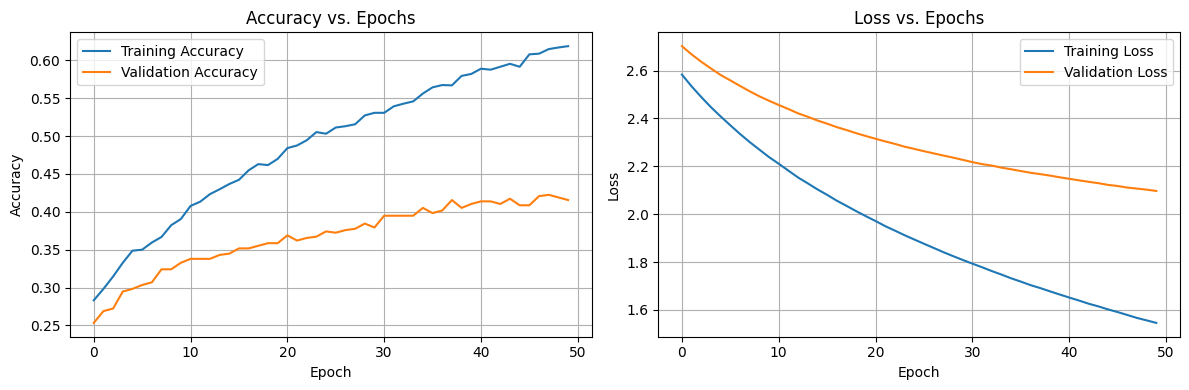

In [21]:
import matplotlib.pyplot as plt
epochs = range(len(history.history['accuracy']))
plt.figure(figsize=(12, 4))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

**Gradio Deployment**

In [ ]:
!pip install -q gradio

import gradio as gr
import numpy as np
import cv2
from tensorflow.keras.models import load_model

# Define the prediction function for Gradio
def predict_image(image):
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize the grayscale image to 64x64
    resized_img = cv2.resize(gray_image, (64, 64))

    # Convert the grayscale image (64x64) to a 3-channel image (64x64x3)
    # by repeating the grayscale channel
    resized_img_3channel = cv2.cvtColor(resized_img, cv2.COLOR_GRAY2RGB)

    # Add batch dimension
    img_array = np.expand_dims(resized_img_3channel, axis=0)

    # Make prediction
    predictions = model_.predict(img_array)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions, axis=1)[0]

    # Get the class label (assuming you have a list or array of class labels)
    # In this case, the labels are sorted alphabetically based on the folders
    class_labels = sorted(list(label_counts.keys()))
    predicted_class_label = class_labels[predicted_class_index]

    return predicted_class_label

# Create the Gradio interface
iface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="numpy"),
    outputs="text",
    title="ASL Alphabet Sign Prediction",
    description="Upload an image of an ASL sign to predict the corresponding letter."
)

# Launch the interface
iface.launch(debug=True)


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://82359f87a36bd53237.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
